## 1. Load and Split Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Distribution of Pristine Train Data

In [5]:
train = pd.concat([X_train, y_train], axis=1)

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

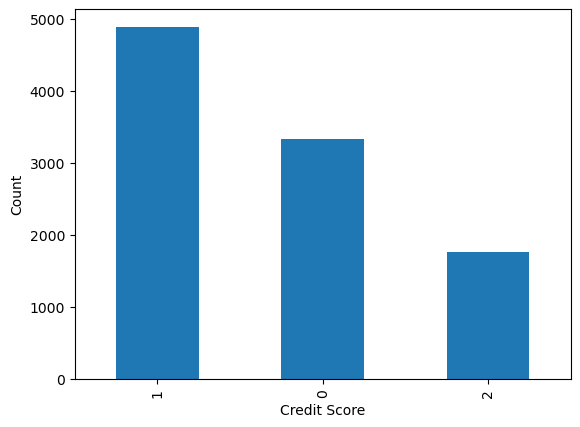

In [7]:
train["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

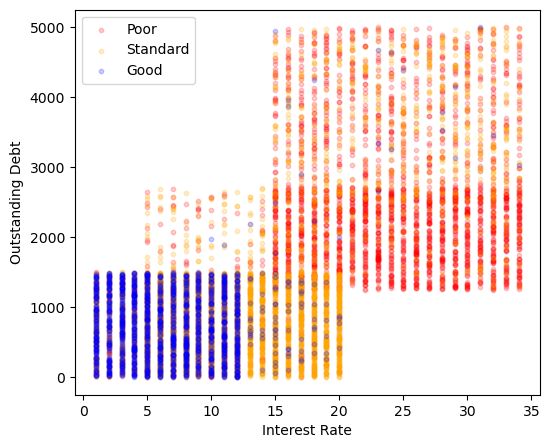

In [8]:
plt.figure(figsize=(6,5))
plt.scatter(train[train["Credit_Score"]==0]["Interest_Rate"], train[train["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train[train["Credit_Score"]==1]["Interest_Rate"], train[train["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train[train["Credit_Score"]==2]["Interest_Rate"], train[train["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue', alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 3. Create Imbalanced Train Data Deliberately

In [9]:
train_0 = train[train['Credit_Score'] == 0]
train_1 = train[train['Credit_Score'] == 1]
train_2 = train[train['Credit_Score'] == 2]

In [10]:
train_0 = train_0.sample(frac=0.2)
train_2 = train_2.sample(frac=0.2)

In [11]:
train = pd.concat([train_0, train_1, train_2], axis=0)

Text(0, 0.5, 'Count')

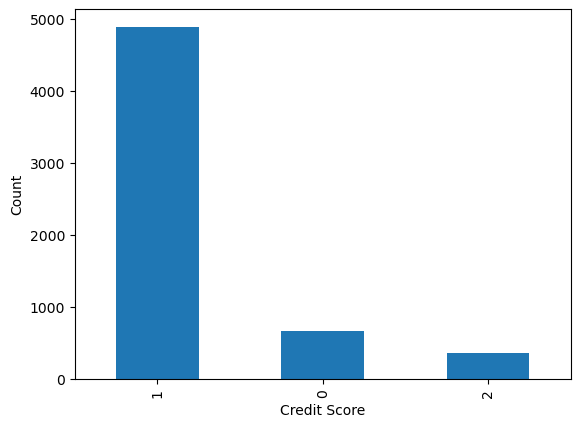

In [12]:
train["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

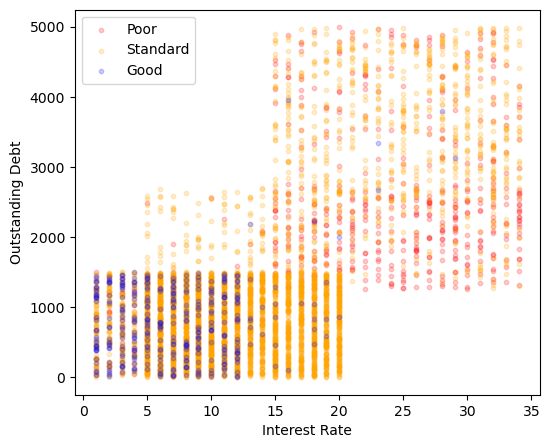

In [13]:
plt.figure(figsize=(6,5))
plt.scatter(train[train["Credit_Score"]==0]["Interest_Rate"], train[train["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train[train["Credit_Score"]==1]["Interest_Rate"], train[train["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train[train["Credit_Score"]==2]["Interest_Rate"], train[train["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue', alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

In [14]:
x_columns = train.columns.tolist()
x_columns.remove('Credit_Score')
X_train = train[x_columns]
y_train = train['Credit_Score']

## 4. Define Data Transformer

In [15]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

## 5. Train RandomForesfClassifier with the Imbalance Data

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x0000022EFBB53890>),
                ('rfc', RandomForestClassifier())])

In [19]:
y_test_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67       822
           1       0.60      0.96      0.74      1217
           2       0.84      0.13      0.22       461

    accuracy                           0.66      2500
   macro avg       0.78      0.54      0.54      2500
weighted avg       0.74      0.66      0.62      2500



In [21]:
confusion_matrix(y_test,y_test_pred)

array([[ 436,  384,    2],
       [  42, 1166,    9],
       [   3,  399,   59]], dtype=int64)

In [22]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

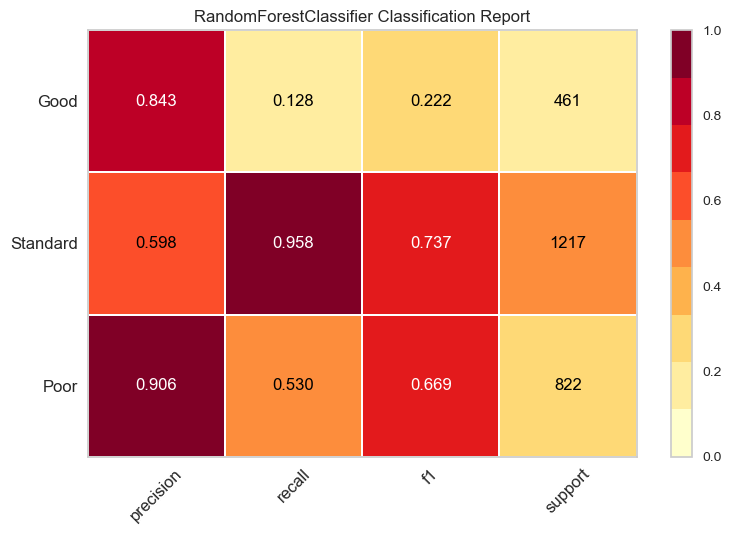

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [23]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

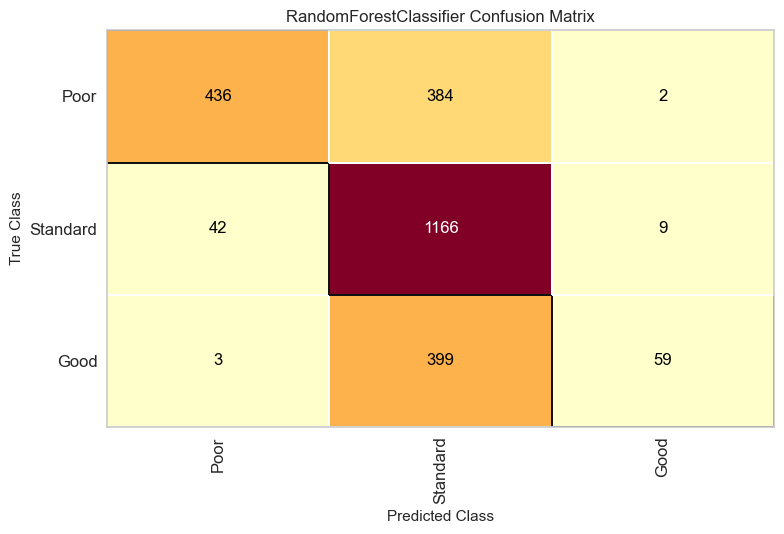

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [24]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

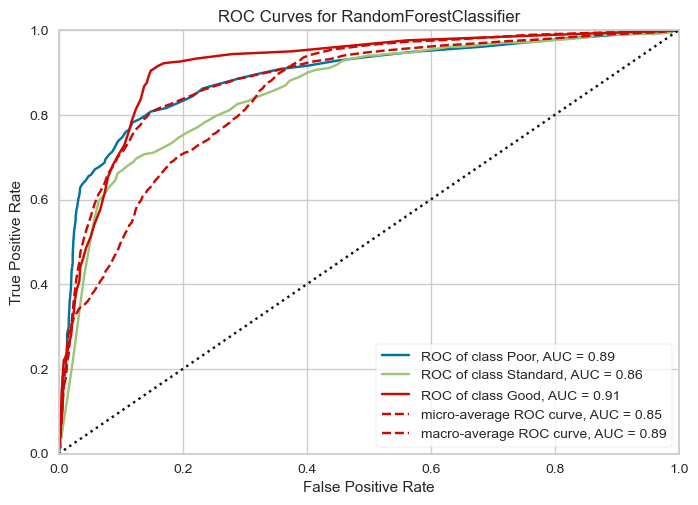

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 6. Undersample the Imbalanced Data with RandomUnderSampler

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [28]:
train_rus = pd.concat([X_train_rus, y_train_rus], axis=1)

Text(0, 0.5, 'Count')

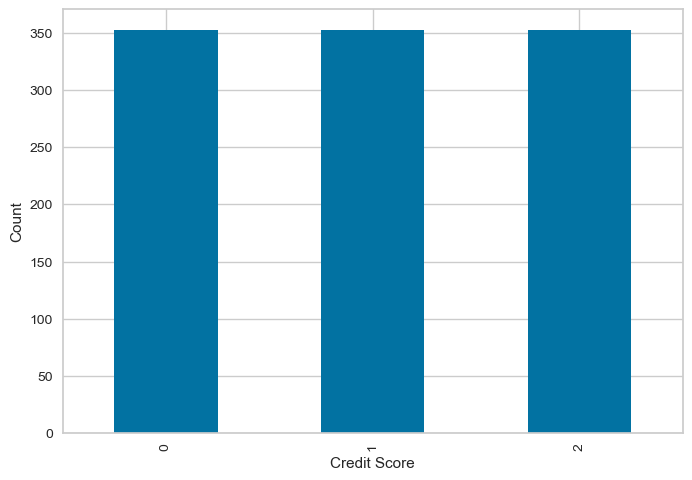

In [29]:
train_rus["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

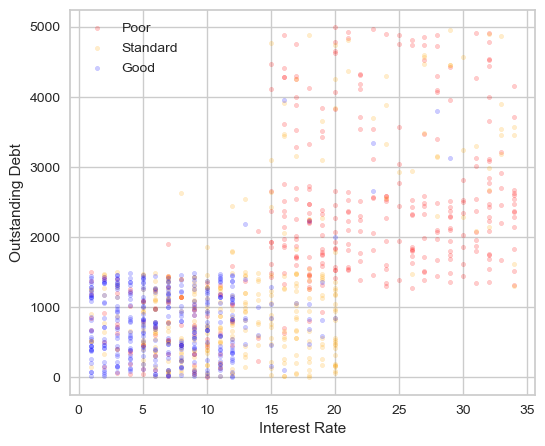

In [30]:
plt.figure(figsize=(6,5))
plt.scatter(train_rus[train_rus["Credit_Score"]==0]["Interest_Rate"], train_rus[train_rus["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_rus[train_rus["Credit_Score"]==1]["Interest_Rate"], train_rus[train_rus["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_rus[train_rus["Credit_Score"]==2]["Interest_Rate"], train_rus[train_rus["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 7. Train RandomForesfClassifier with the RandomUnderSampler-undersampled Data

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
steps = [('dtf', Data_Transformer()),
        ('rfc', RandomForestClassifier())]
model = Pipeline(steps)

In [33]:
model.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('dtf',
                 <__main__.Data_Transformer object at 0x0000022EFD4E7290>),
                ('rfc', RandomForestClassifier())])

In [34]:
y_test_pred = model.predict(X_test)

In [35]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       822
           1       0.87      0.66      0.75      1217
           2       0.59      0.89      0.71       461

    accuracy                           0.75      2500
   macro avg       0.73      0.78      0.74      2500
weighted avg       0.78      0.75      0.75      2500



In [36]:
confusion_matrix(y_test,y_test_pred)

array([[654,  83,  85],
       [212, 804, 201],
       [ 10,  40, 411]], dtype=int64)

In [37]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

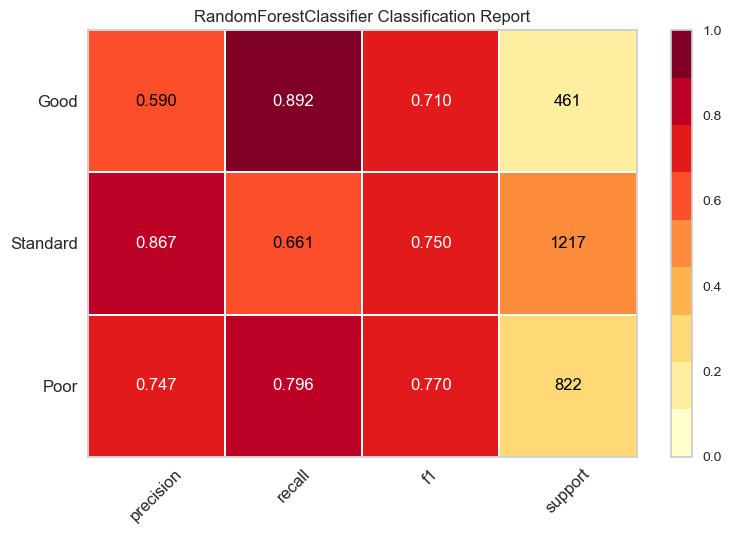

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [38]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train_rus, y_train_rus)
visualizer.score(X_test, y_test)
visualizer.show()

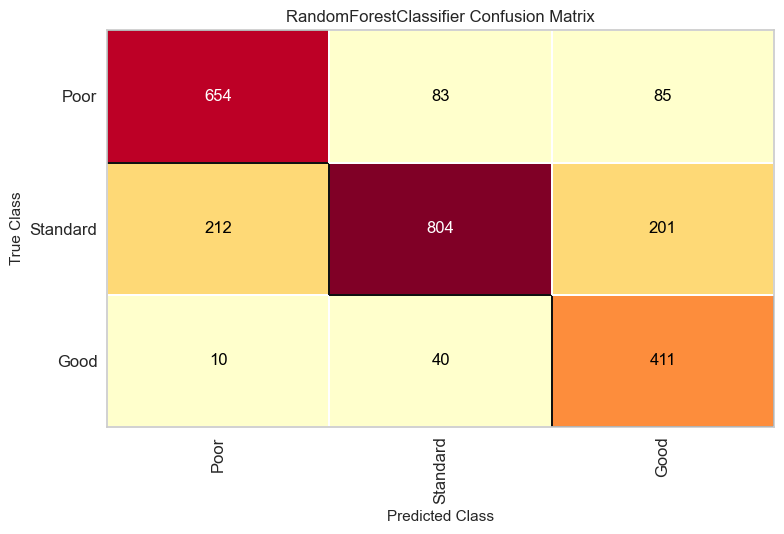

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_rus, y_train_rus)
visualizer.score(X_test, y_test)
visualizer.show()

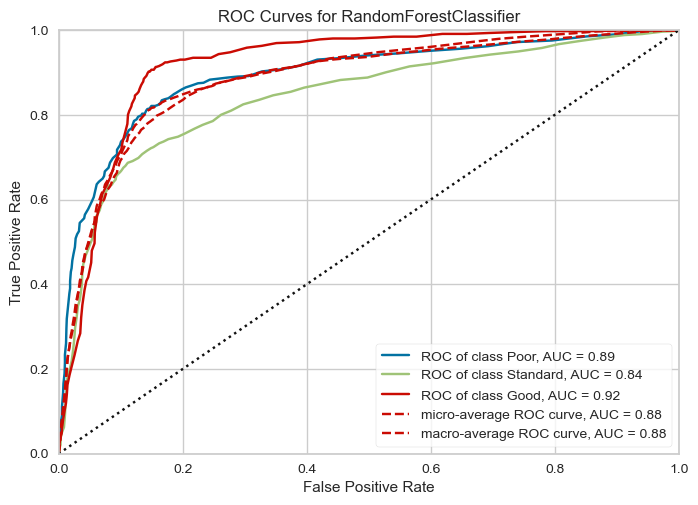

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [40]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_rus, y_train_rus)
visualizer.score(X_test, y_test)
visualizer.show()

## 8. Undersample the Imbalanced Data with ClusterCentroids

In [41]:
dtf = Data_Transformer()
X_train = dtf.fit_transform(X_train)
X_test = dtf.transform(X_test)

In [42]:
from imblearn.under_sampling import ClusterCentroids

In [43]:
cc = ClusterCentroids()
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
train_cc = pd.concat([X_train_cc, y_train_cc], axis=1)

Text(0, 0.5, 'Count')

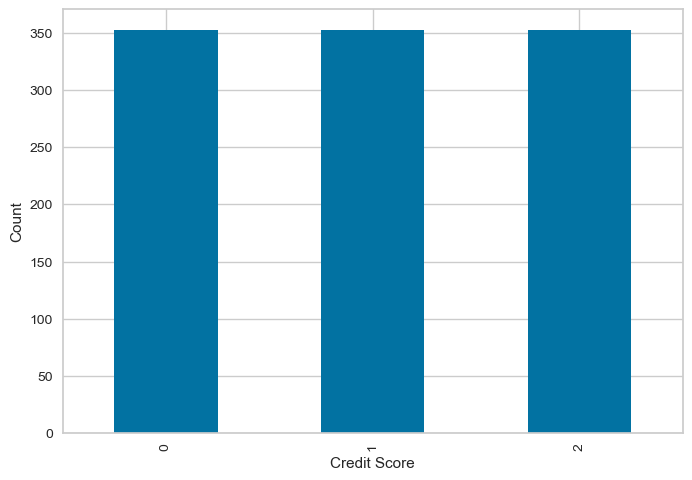

In [45]:
train_cc["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

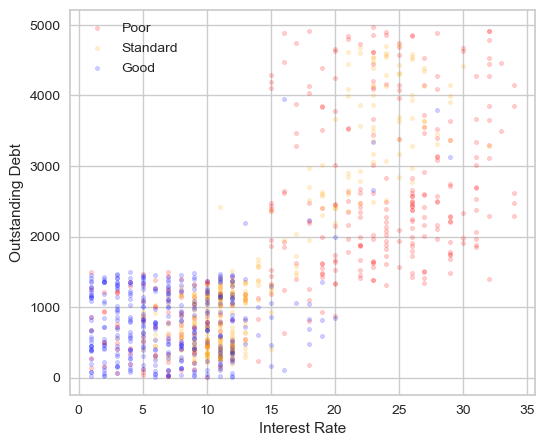

In [46]:
plt.figure(figsize=(6,5))
plt.scatter(train_cc[train_cc["Credit_Score"]==0]["Interest_Rate"], train_cc[train_cc["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_cc[train_cc["Credit_Score"]==1]["Interest_Rate"], train_cc[train_cc["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_cc[train_cc["Credit_Score"]==2]["Interest_Rate"], train_cc[train_cc["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 9. Train RandomForesfClassifier with the ClusterCentroids-undersampled Data

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
model = RandomForestClassifier()

In [49]:
model.fit(X_train_cc, y_train_cc)

RandomForestClassifier()

In [50]:
y_test_pred = model.predict(X_test)

In [51]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.84      0.68       822
           1       0.67      0.01      0.02      1217
           2       0.34      0.93      0.50       461

    accuracy                           0.45      2500
   macro avg       0.52      0.59      0.40      2500
weighted avg       0.57      0.45      0.32      2500



In [52]:
confusion_matrix(y_test,y_test_pred)

array([[690,   4, 128],
       [501,  12, 704],
       [ 28,   2, 431]], dtype=int64)

In [53]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


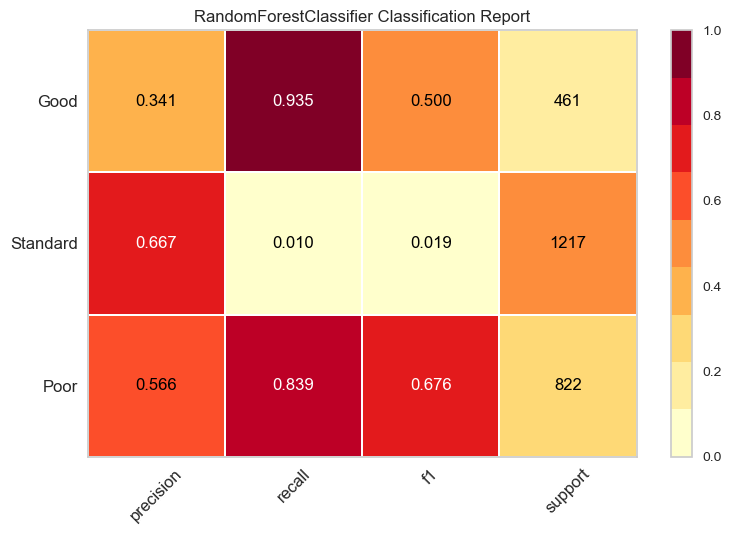

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [54]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train_cc, y_train_cc)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


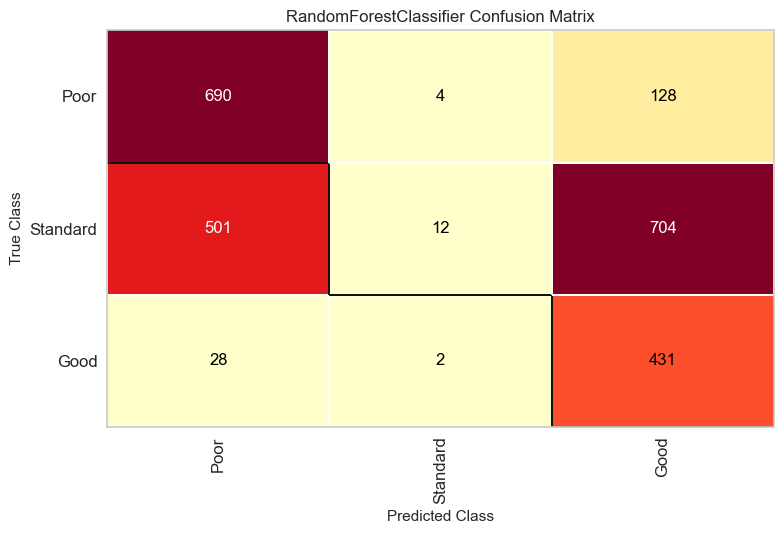

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_cc, y_train_cc)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


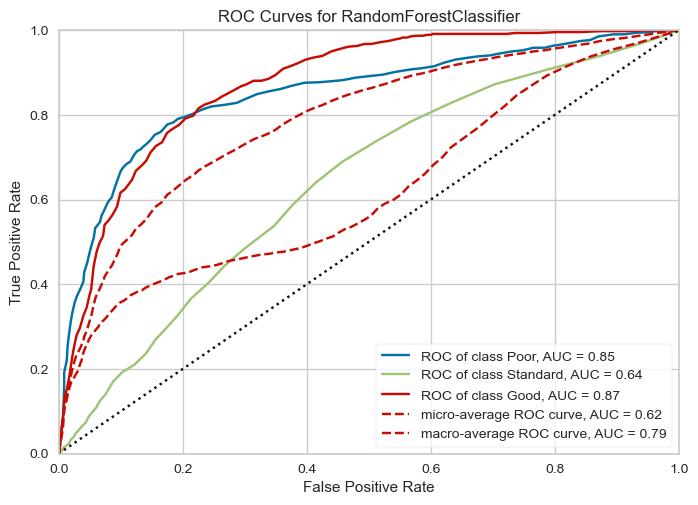

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_cc, y_train_cc)
visualizer.score(X_test, y_test)
visualizer.show()

## 10. Undersample the Imbalanced Data with CondensedNearestNeighbour

In [57]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [58]:
cnn = CondensedNearestNeighbour()
X_train_cnn, y_train_cnn = cnn.fit_resample(X_train, y_train)

In [59]:
train_cnn = pd.concat([X_train_cnn, y_train_cnn], axis=1)

Text(0, 0.5, 'Count')

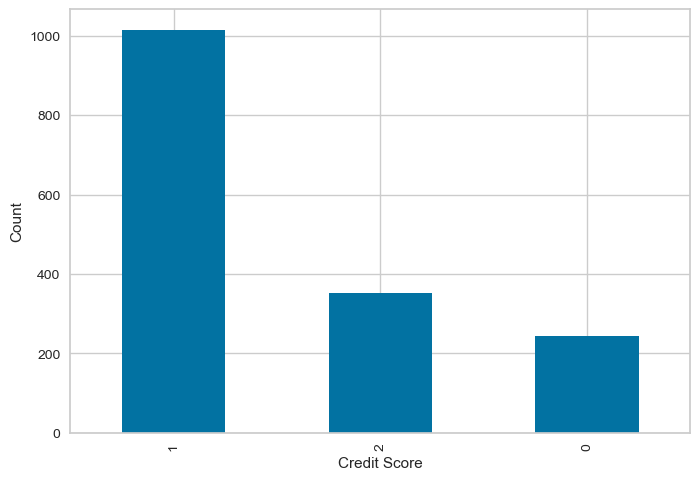

In [60]:
train_cnn["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

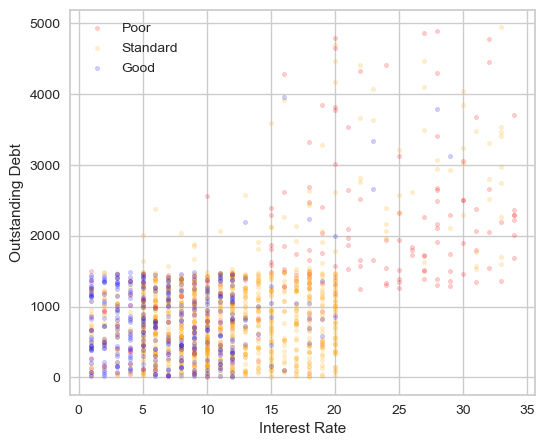

In [61]:
plt.figure(figsize=(6,5))
plt.scatter(train_cnn[train_cnn["Credit_Score"]==0]["Interest_Rate"], train_cnn[train_cnn["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_cnn[train_cnn["Credit_Score"]==1]["Interest_Rate"], train_cnn[train_cnn["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_cnn[train_cnn["Credit_Score"]==2]["Interest_Rate"], train_cnn[train_cnn["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 11. Train RandomForesfClassifier with the CondensedNearestNeighbour-undersampled Data

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
model = RandomForestClassifier()

In [64]:
model.fit(X_train_cnn, y_train_cnn)

RandomForestClassifier()

In [65]:
y_test_pred = model.predict(X_test)

In [66]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       822
           1       0.71      0.82      0.76      1217
           2       0.66      0.64      0.65       461

    accuracy                           0.73      2500
   macro avg       0.73      0.70      0.71      2500
weighted avg       0.73      0.73      0.72      2500



In [67]:
confusion_matrix(y_test,y_test_pred)

array([[522, 258,  42],
       [107, 999, 111],
       [ 15, 151, 295]], dtype=int64)

In [68]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


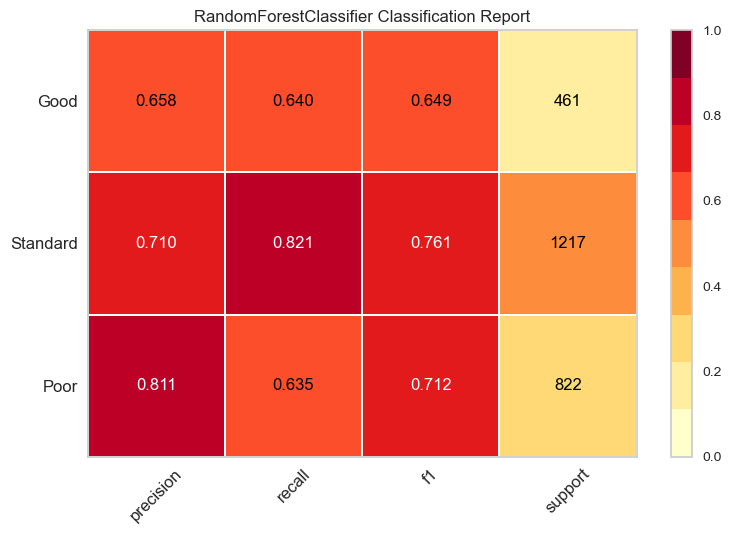

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [69]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train_cnn, y_train_cnn)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


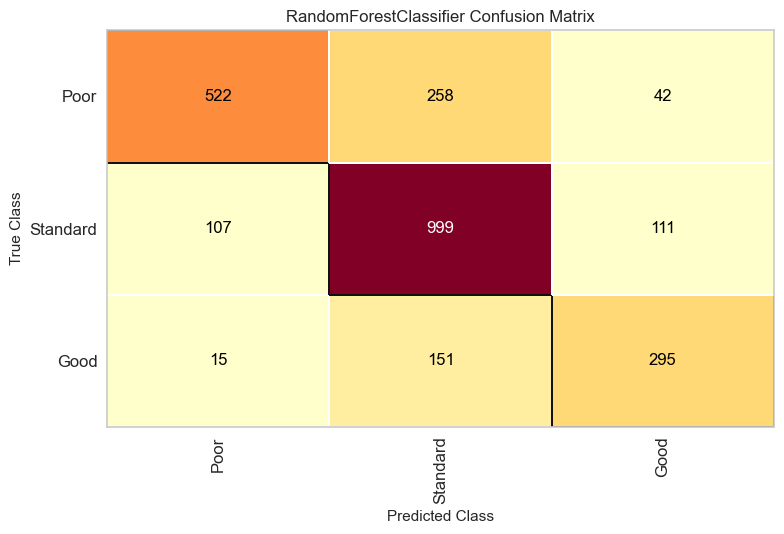

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_cnn, y_train_cnn)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


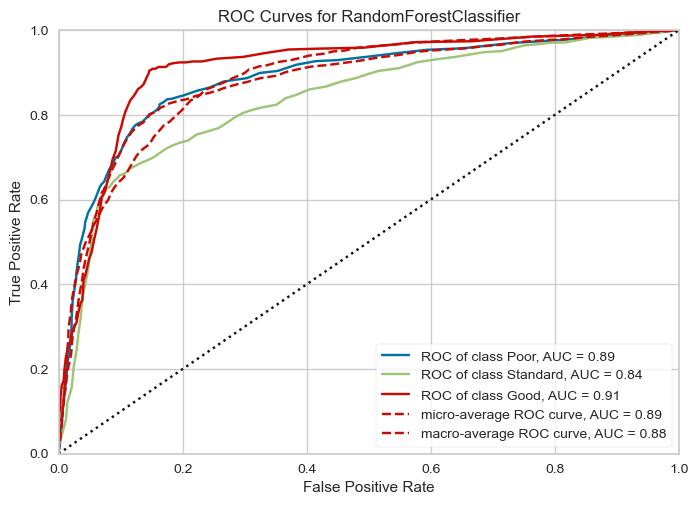

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [71]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_cnn, y_train_cnn)
visualizer.score(X_test, y_test)
visualizer.show()

## 12. Undersample the Imbalanced Data with EditedNearestNeighbours

In [72]:
from imblearn.under_sampling import EditedNearestNeighbours

In [73]:
enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X_train, y_train)

In [74]:
train_enn = pd.concat([X_train_enn, y_train_enn], axis=1)

Text(0, 0.5, 'Count')

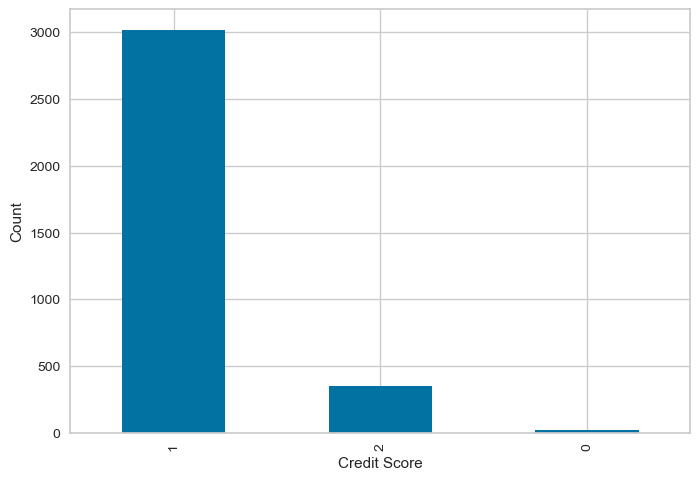

In [75]:
train_enn["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

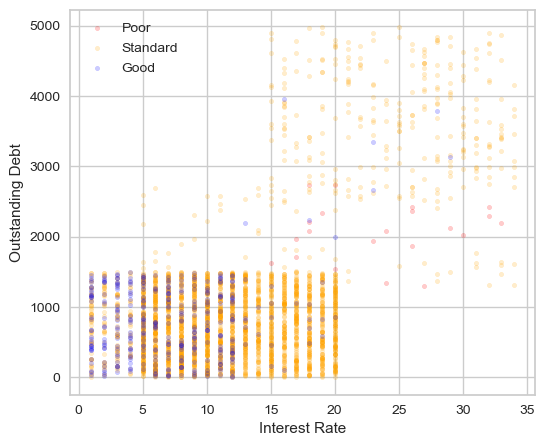

In [76]:
plt.figure(figsize=(6,5))
plt.scatter(train_enn[train_enn["Credit_Score"]==0]["Interest_Rate"], train_enn[train_enn["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_enn[train_enn["Credit_Score"]==1]["Interest_Rate"], train_enn[train_enn["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_enn[train_enn["Credit_Score"]==2]["Interest_Rate"], train_enn[train_enn["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 13. Train RandomForesfClassifier with the EditedNearestNeighbours-undersampled Data

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
model = RandomForestClassifier()

In [79]:
model.fit(X_train_enn, y_train_enn)

RandomForestClassifier()

In [80]:
y_test_pred = model.predict(X_test)

In [81]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.03       822
           1       0.51      0.98      0.67      1217
           2       0.79      0.21      0.33       461

    accuracy                           0.52      2500
   macro avg       0.77      0.40      0.34      2500
weighted avg       0.72      0.52      0.40      2500



In [82]:
confusion_matrix(y_test,y_test_pred)

array([[  14,  802,    6],
       [   0, 1198,   19],
       [   0,  366,   95]], dtype=int64)

In [83]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


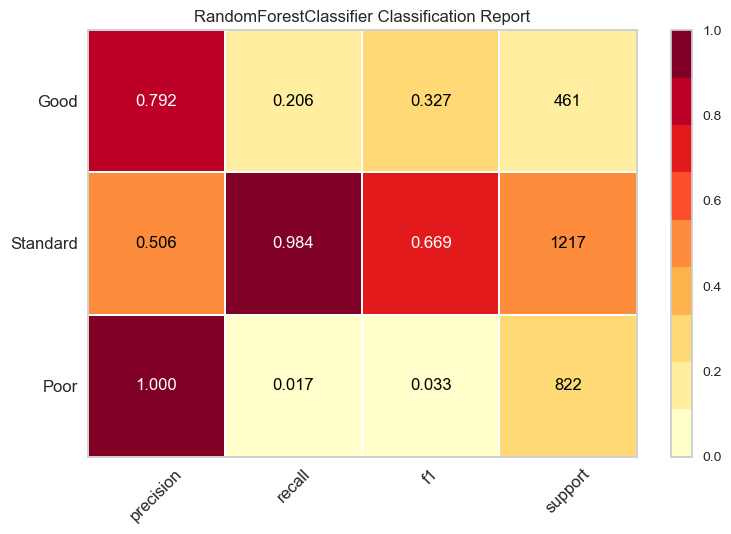

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [84]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train_enn, y_train_enn)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


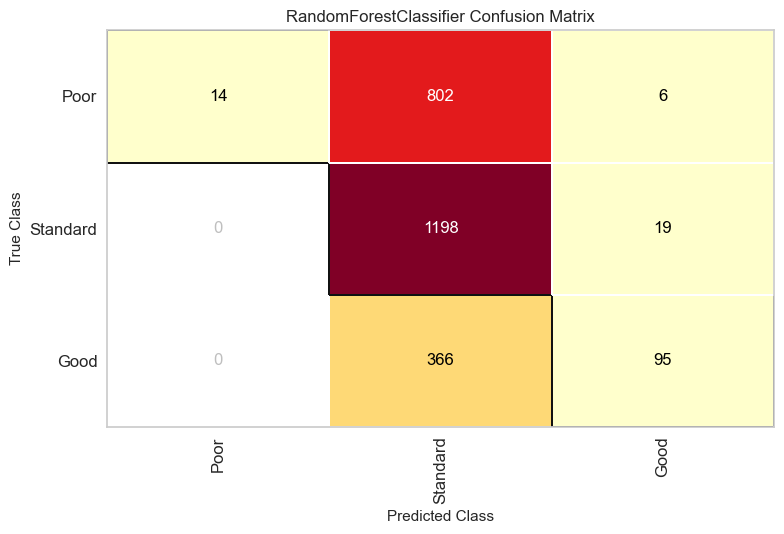

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [85]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_enn, y_train_enn)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


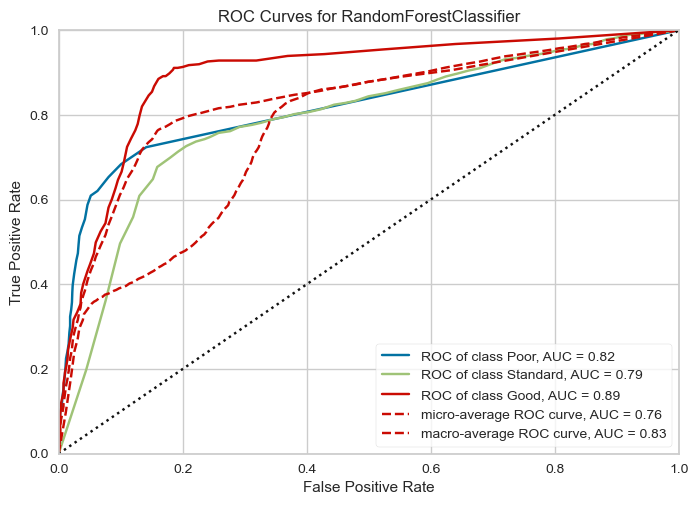

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [86]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_enn, y_train_enn)
visualizer.score(X_test, y_test)
visualizer.show()

## 14. Undersample the Imbalanced Data with NearMiss

In [87]:
from imblearn.under_sampling import NearMiss

In [88]:
nm = NearMiss(version=3)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

c:\Users\fhan1\anaconda3\Lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


In [89]:
train_nm = pd.concat([X_train_nm, y_train_nm], axis=1)

Text(0, 0.5, 'Count')

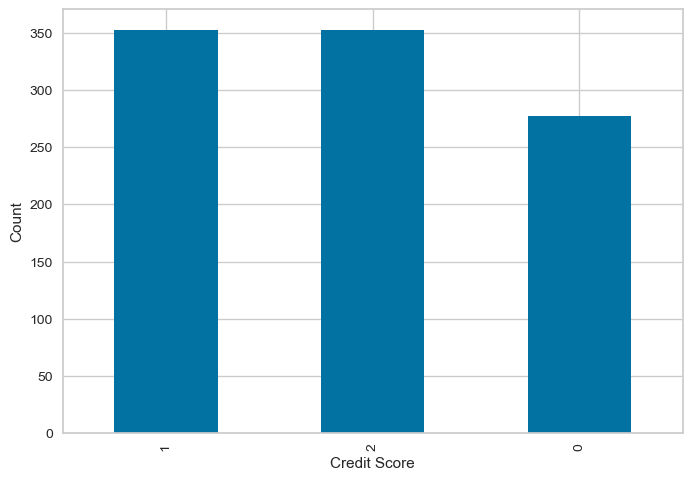

In [90]:
train_nm["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

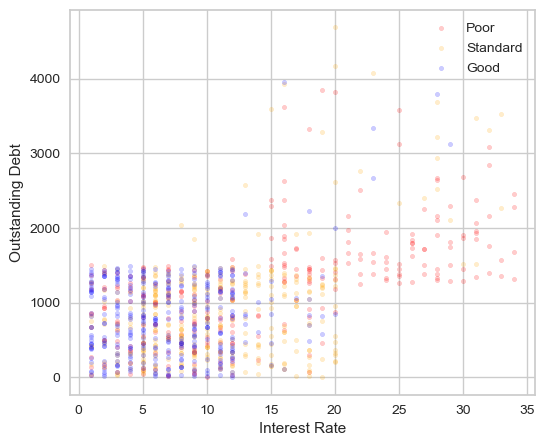

In [91]:
plt.figure(figsize=(6,5))
plt.scatter(train_nm[train_nm["Credit_Score"]==0]["Interest_Rate"], train_nm[train_nm["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_nm[train_nm["Credit_Score"]==1]["Interest_Rate"], train_nm[train_nm["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_nm[train_nm["Credit_Score"]==2]["Interest_Rate"], train_nm[train_nm["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 15. Train RandomForesfClassifier with the NearMiss-undersampled Data

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
model = RandomForestClassifier()

In [94]:
model.fit(X_train_nm, y_train_nm)

RandomForestClassifier()

In [95]:
y_test_pred = model.predict(X_test)

In [96]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71       822
           1       0.79      0.53      0.63      1217
           2       0.55      0.77      0.64       461

    accuracy                           0.66      2500
   macro avg       0.66      0.70      0.66      2500
weighted avg       0.70      0.66      0.66      2500



In [97]:
confusion_matrix(y_test,y_test_pred)

array([[663,  95,  64],
       [347, 643, 227],
       [ 32,  75, 354]], dtype=int64)

In [98]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


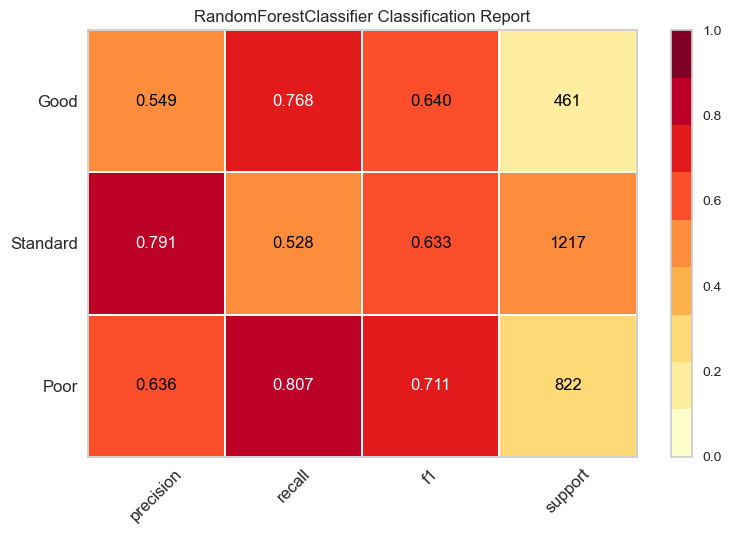

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [99]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train_nm, y_train_nm)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


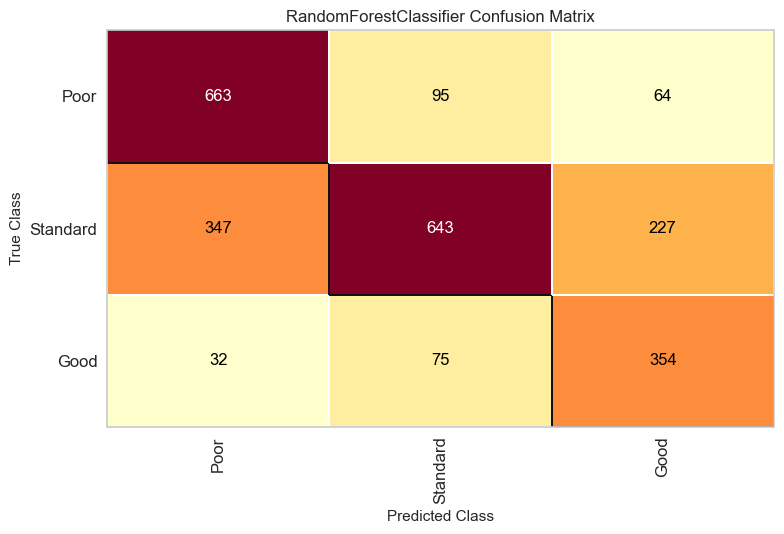

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [100]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_nm, y_train_nm)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


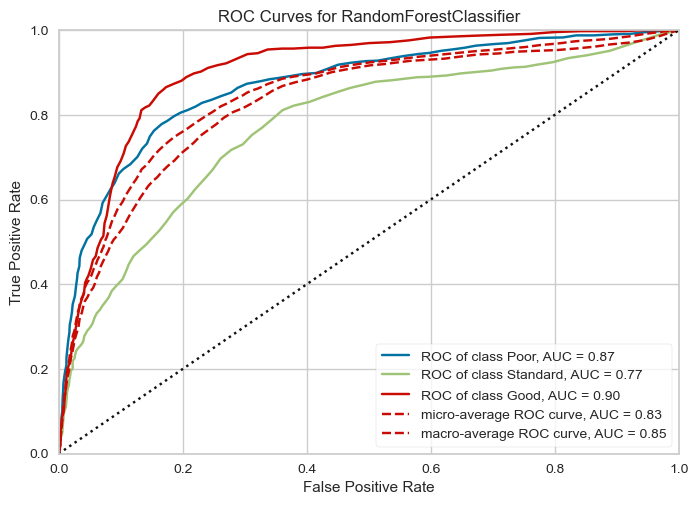

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [101]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_nm, y_train_nm)
visualizer.score(X_test, y_test)
visualizer.show()

## 16. Undersample the Imbalanced Data with TomekLinks

In [102]:
from imblearn.under_sampling import TomekLinks

In [103]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)

In [104]:
train_tl = pd.concat([X_train_tl, y_train_tl], axis=1)

Text(0, 0.5, 'Count')

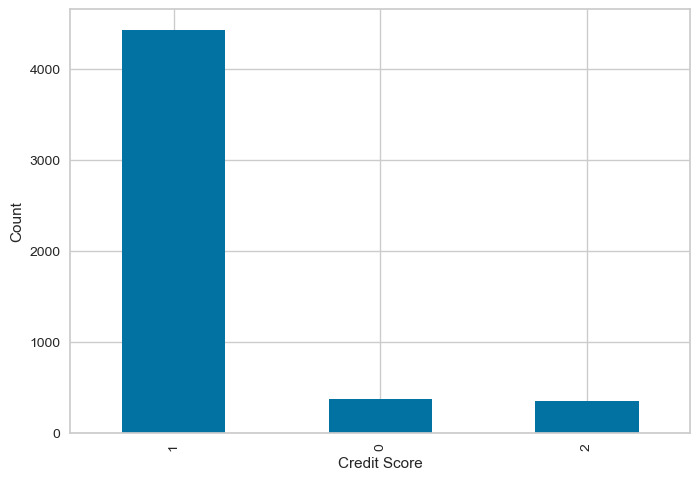

In [105]:
train_tl["Credit_Score"].value_counts().plot(kind="bar")
plt.xlabel("Credit Score")
plt.ylabel("Count")

Text(0, 0.5, 'Outstanding Debt')

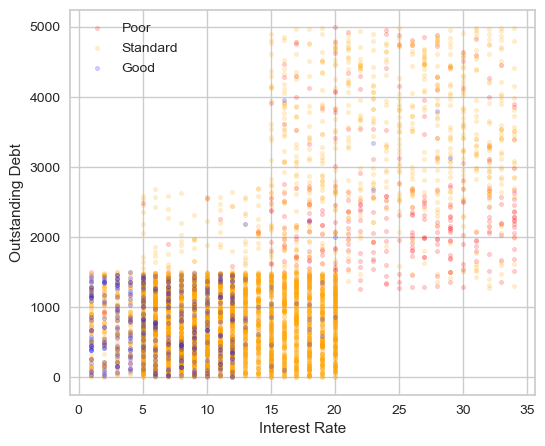

In [106]:
plt.figure(figsize=(6,5))
plt.scatter(train_tl[train_tl["Credit_Score"]==0]["Interest_Rate"], train_tl[train_tl["Credit_Score"]==0]["Outstanding_Debt"], s=10, c='red', alpha=0.2, label="Poor")
plt.scatter(train_tl[train_tl["Credit_Score"]==1]["Interest_Rate"], train_tl[train_tl["Credit_Score"]==1]["Outstanding_Debt"], s=10, c='orange', alpha=0.2, label="Standard")
plt.scatter(train_tl[train_tl["Credit_Score"]==2]["Interest_Rate"], train_tl[train_tl["Credit_Score"]==2]["Outstanding_Debt"], s=10, c='blue',alpha=0.2, label="Good")
plt.legend()
plt.xlabel("Interest Rate")
plt.ylabel("Outstanding Debt")

## 17. Train RandomForesfClassifier with the TomekLinks-undersampled Data

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
model = RandomForestClassifier()

In [109]:
model.fit(X_train_tl, y_train_tl)

RandomForestClassifier()

In [110]:
y_test_pred = model.predict(X_test)

In [111]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.42      0.57       822
           1       0.58      0.96      0.72      1217
           2       0.83      0.16      0.26       461

    accuracy                           0.64      2500
   macro avg       0.77      0.51      0.52      2500
weighted avg       0.73      0.64      0.59      2500



In [112]:
confusion_matrix(y_test,y_test_pred)

array([[ 343,  474,    5],
       [  33, 1174,   10],
       [   0,  389,   72]], dtype=int64)

In [113]:
from yellowbrick.classifier import ClassificationReport,ConfusionMatrix,ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


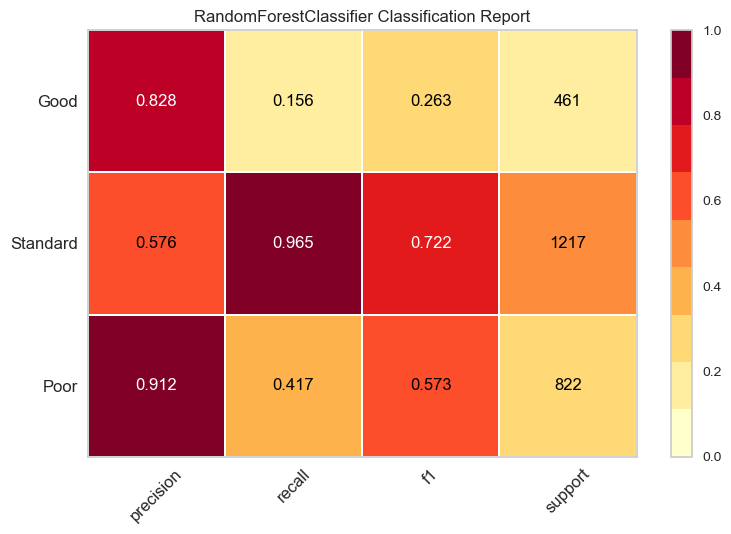

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [114]:
visualizer = ClassificationReport(model, classes=["Poor", "Standard", "Good"], support=True)
visualizer.fit(X_train_tl, y_train_tl)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


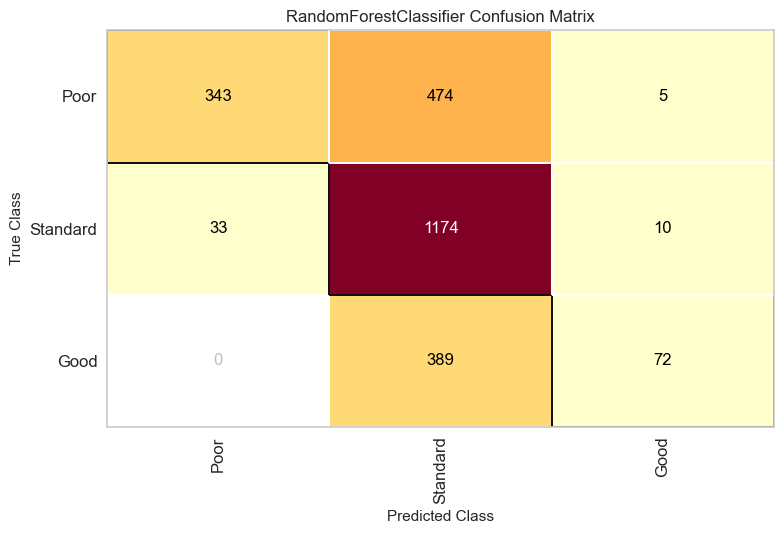

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [115]:
visualizer = ConfusionMatrix(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_tl, y_train_tl)
visualizer.score(X_test, y_test)
visualizer.show()

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


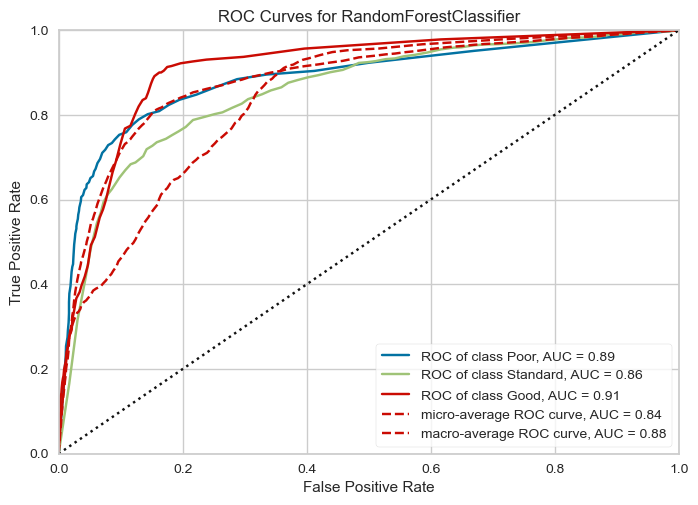

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [116]:
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train_tl, y_train_tl)
visualizer.score(X_test, y_test)
visualizer.show()